In [1]:
from re import sub
from decimal import Decimal
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# **Data Loading**

In [2]:
data = pd.read_csv("car_insurance_claim.csv")
data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [3]:
data.drop('BIRTH', axis = 1, inplace = True)
data.isna().sum()

ID              0
KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [4]:
DF = data.dropna(subset = ['INCOME'], how = 'any')

In [5]:
DF = DF.dropna(subset = ['HOME_VAL'], how = 'any')

In [6]:
DF.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
5,743146596,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,...,z_SUV,no,"$19,217",2,Yes,3,$0,17.0,0,Highly Urban/ Urban


In [7]:
DF.isna().sum()

ID              0
KIDSDRIV        0
AGE             4
HOMEKIDS        0
YOJ           488
INCOME          0
PARENT1         0
HOME_VAL        0
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    584
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       563
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

# **Data Preprocessing**

In [8]:
def convertMoney(x):
  value = Decimal(sub(r'[^\d.]', '', x))
  return value

In [9]:
DF['Income_converted'] = DF['INCOME'].apply(lambda x: convertMoney(x))
DF.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,Income_converted
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban,67349
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban,91449
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban,52881
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban,16039
5,743146596,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,...,no,"$19,217",2,Yes,3,$0,17.0,0,Highly Urban/ Urban,114986


In [10]:
DF['HOME_VAL_converted'] = DF['HOME_VAL'].apply(lambda x: convertMoney(x))

In [11]:
DF['BLUEBOOK_converted'] = DF['BLUEBOOK'].apply(lambda x: convertMoney(x))

In [12]:
DF['OLDCLAIM_converted'] = DF['OLDCLAIM'].apply(lambda x: convertMoney(x))

In [13]:
DF['CLM_AMT_converted'] = DF['CLM_AMT'].apply(lambda x: convertMoney(x))

In [14]:
DF.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,Income_converted,HOME_VAL_converted,BLUEBOOK_converted,OLDCLAIM_converted,CLM_AMT_converted
0,63581743,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,...,3,$0,18.0,0,Highly Urban/ Urban,67349,0,14230,4461,0
1,132761049,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,...,0,$0,1.0,0,Highly Urban/ Urban,91449,257252,14940,0,0
2,921317019,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,...,2,$0,10.0,0,Highly Urban/ Urban,52881,0,21970,0,0
3,727598473,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,...,3,$0,10.0,0,Highly Urban/ Urban,16039,124191,4010,38690,0
5,743146596,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,...,3,$0,17.0,0,Highly Urban/ Urban,114986,243925,18000,19217,0


In [15]:
DF['Income_converted'] = DF['Income_converted'].astype('float64')
DF['HOME_VAL_converted'] = DF['HOME_VAL_converted'].astype('float64')
DF['BLUEBOOK_converted'] = DF['BLUEBOOK_converted'].astype('float64')
DF['OLDCLAIM_converted'] = DF['OLDCLAIM_converted'].astype('float64')
DF['CLM_AMT_converted'] = DF['CLM_AMT_converted'].astype('float64')

In [16]:
DF1 = DF.drop(['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT'], axis = 1)
DF1.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,REVOKED,MVR_PTS,CAR_AGE,CLAIM_FLAG,URBANICITY,Income_converted,HOME_VAL_converted,BLUEBOOK_converted,OLDCLAIM_converted,CLM_AMT_converted
0,63581743,0,60.0,0,11.0,No,z_No,M,PhD,Professional,...,No,3,18.0,0,Highly Urban/ Urban,67349.0,0.0,14230.0,4461.0,0.0
1,132761049,0,43.0,0,11.0,No,z_No,M,z_High School,z_Blue Collar,...,No,0,1.0,0,Highly Urban/ Urban,91449.0,257252.0,14940.0,0.0,0.0
2,921317019,0,48.0,0,11.0,No,z_No,M,Bachelors,Manager,...,No,2,10.0,0,Highly Urban/ Urban,52881.0,0.0,21970.0,0.0,0.0
3,727598473,0,35.0,1,10.0,No,Yes,z_F,z_High School,Clerical,...,No,3,10.0,0,Highly Urban/ Urban,16039.0,124191.0,4010.0,38690.0,0.0
5,743146596,0,50.0,0,NaN,No,Yes,z_F,PhD,Doctor,...,Yes,3,17.0,0,Highly Urban/ Urban,114986.0,243925.0,18000.0,19217.0,0.0


# **Data Visualization**

<AxesSubplot:xlabel='EDUCATION', ylabel='Income_converted'>

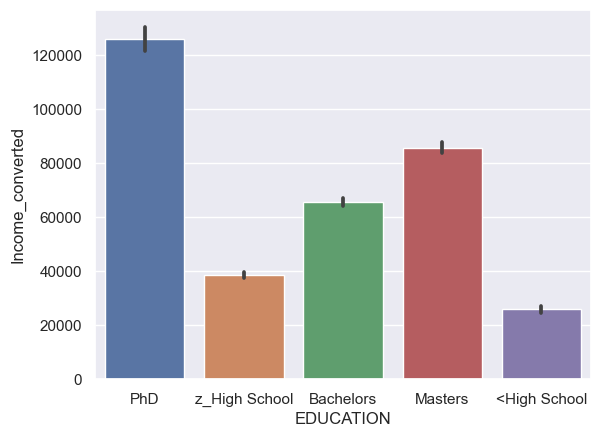

In [17]:
sns.set_theme()
sns.barplot(data = DF1,x = 'EDUCATION', y = 'Income_converted', label = 'CLAIM_FLAG')

<AxesSubplot:xlabel='CAR_USE', ylabel='count'>

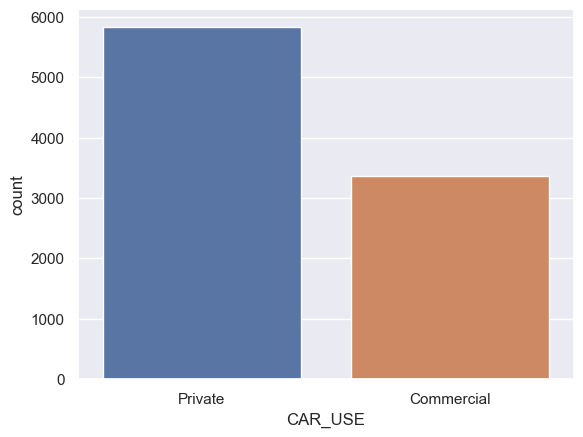

In [18]:
sns.set_theme()
sns.countplot(data = DF1, x = 'CAR_USE')

<AxesSubplot:xlabel='Income_converted', ylabel='Count'>

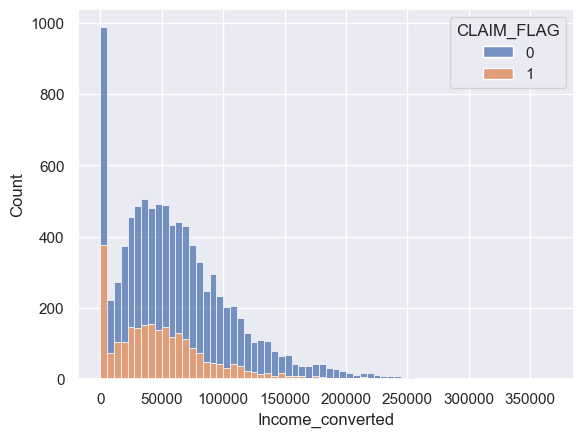

In [19]:
sns.set_theme()
sns.histplot(DF1, x = 'Income_converted', hue = 'CLAIM_FLAG', multiple = 'stack')

<AxesSubplot:xlabel='AGE', ylabel='Count'>

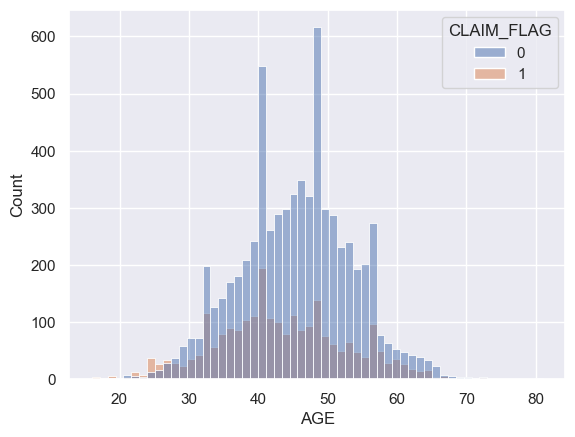

In [20]:
sns.set_theme()
sns.histplot(data = DF1, x = 'AGE', hue = 'CLAIM_FLAG')

<AxesSubplot:xlabel='CLAIM_FLAG', ylabel='CLM_AMT_converted'>

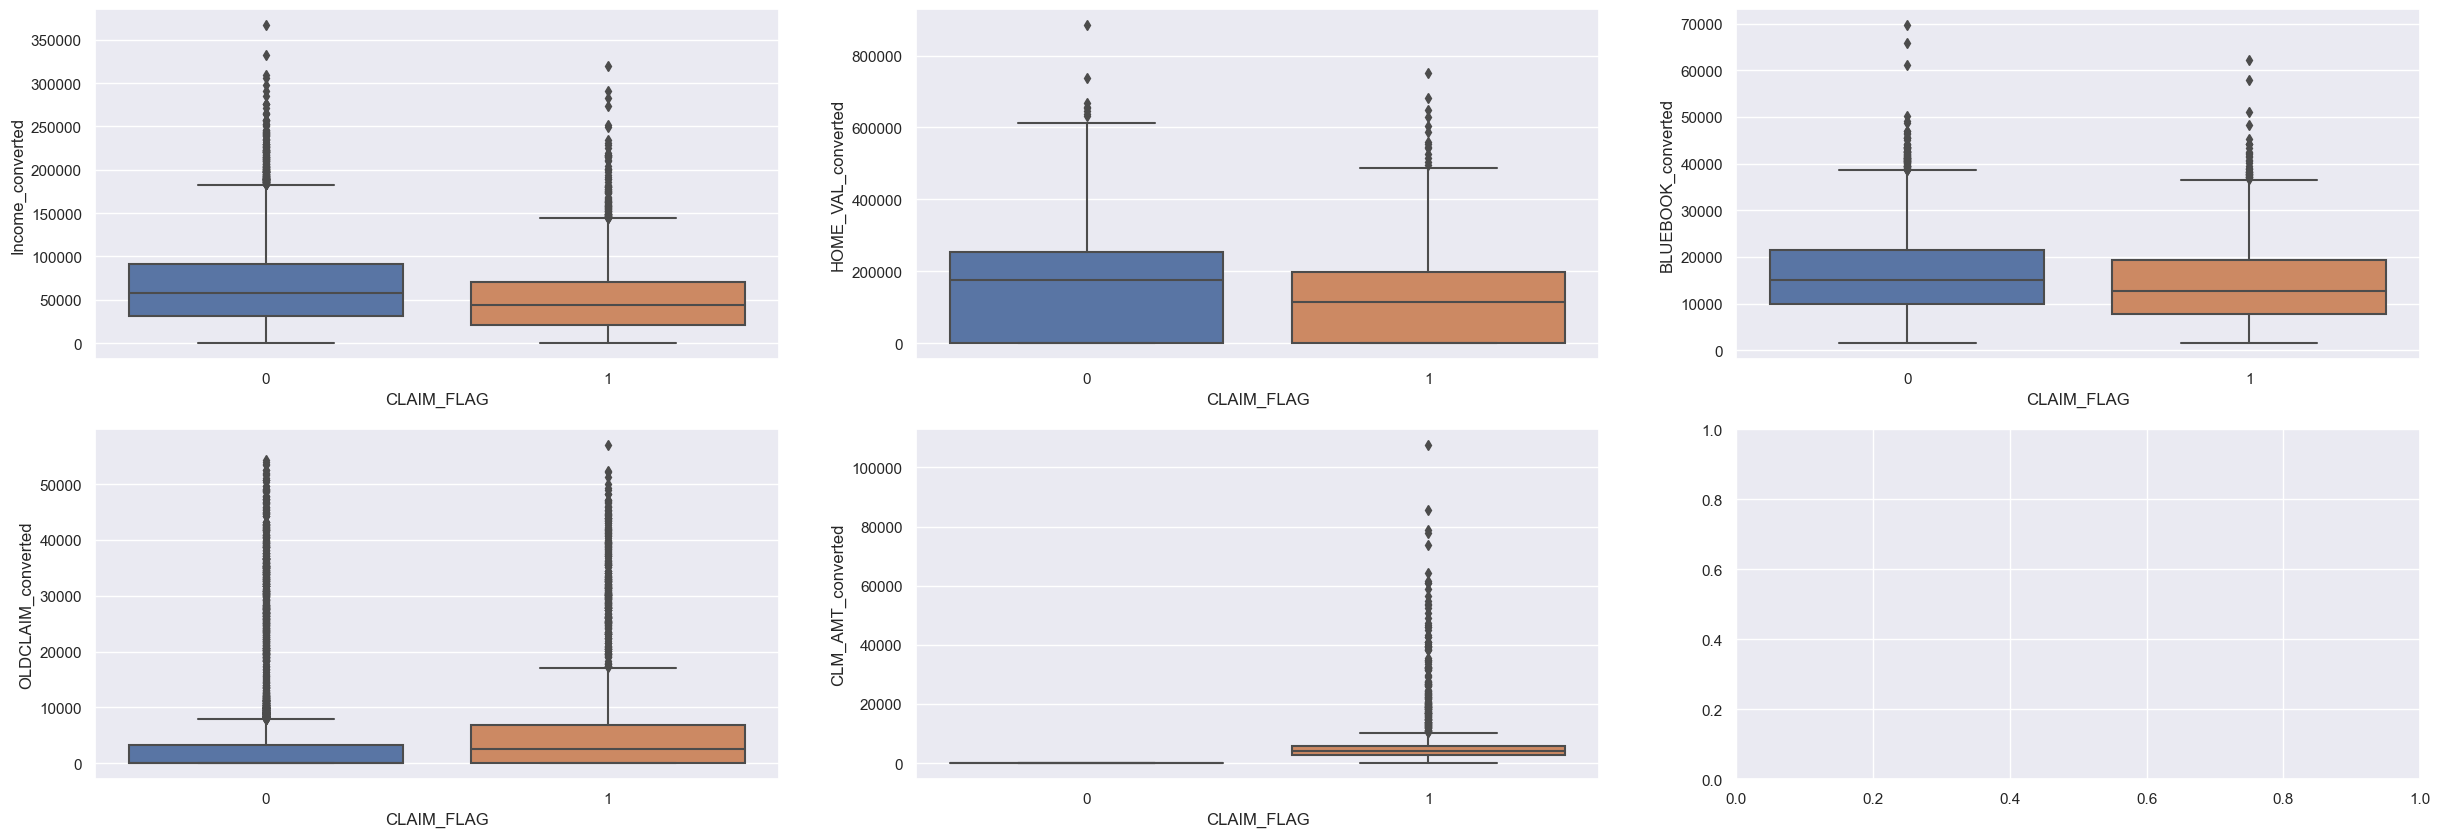

In [21]:
sns.set_theme()
figure, axis = plt.subplots(2,3, figsize = (30,10))
sns.boxplot(y = 'Income_converted', x = 'CLAIM_FLAG', data = DF1, ax = axis[0,0])
sns.boxplot(y = 'HOME_VAL_converted', x = 'CLAIM_FLAG', data = DF1, ax = axis[0,1])
sns.boxplot(y = 'BLUEBOOK_converted', x = 'CLAIM_FLAG', data = DF1, ax = axis[0,2])
sns.boxplot(y = 'OLDCLAIM_converted', x = 'CLAIM_FLAG', data = DF1, ax = axis[1,0])
sns.boxplot(y = 'CLM_AMT_converted', x = 'CLAIM_FLAG', data = DF1, ax = axis[1,1])


# **Data Preprocessing : Outlier Removing Part 1**

In [22]:
def IQR(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)

  IQR = Q3 - Q1
  LR = Q1 - (IQR * 1.5)
  UR = Q3 + (IQR * 1.5)

  return LR, UR

In [23]:
class_one = DF1[DF1['CLAIM_FLAG'] == 1]
class_zero = DF1[DF1['CLAIM_FLAG'] == 0]

In [24]:
LR1, UR1 = IQR(class_one.Income_converted)
LR0, UR0 = IQR(class_zero.Income_converted)
class_one = class_one[(class_one['Income_converted'] > LR1) & (class_one['Income_converted'] < UR1)]
class_zero = class_zero[(class_zero['Income_converted'] > LR0) & (class_zero['Income_converted'] < UR0)]

In [25]:
LR1, UR1 = IQR(class_one.HOME_VAL_converted)
LR0, UR0 = IQR(class_zero.HOME_VAL_converted)
class_one = class_one[(class_one['HOME_VAL_converted'] > LR1) & (class_one['HOME_VAL_converted'] < UR1)]
class_zero = class_zero[(class_zero['HOME_VAL_converted'] > LR0) & (class_zero['HOME_VAL_converted'] < UR0)]

In [26]:
LR1, UR1 = IQR(class_one.BLUEBOOK_converted)
LR0, UR0 = IQR(class_zero.BLUEBOOK_converted)
class_one = class_one[(class_one['BLUEBOOK_converted'] > LR1) & (class_one['BLUEBOOK_converted'] < UR1)]
class_zero = class_zero[(class_zero['BLUEBOOK_converted'] > LR0) & (class_zero['BLUEBOOK_converted'] < UR0)]

In [27]:
LR1, UR1 = IQR(class_one.CLM_AMT_converted)
class_one = class_one[(class_one['CLM_AMT_converted'] > LR1) & (class_one['CLM_AMT_converted'] < UR1)]

In [28]:
DF2 = pd.concat([class_one, class_zero], axis = 0)

<AxesSubplot:xlabel='CLAIM_FLAG', ylabel='CLM_AMT_converted'>

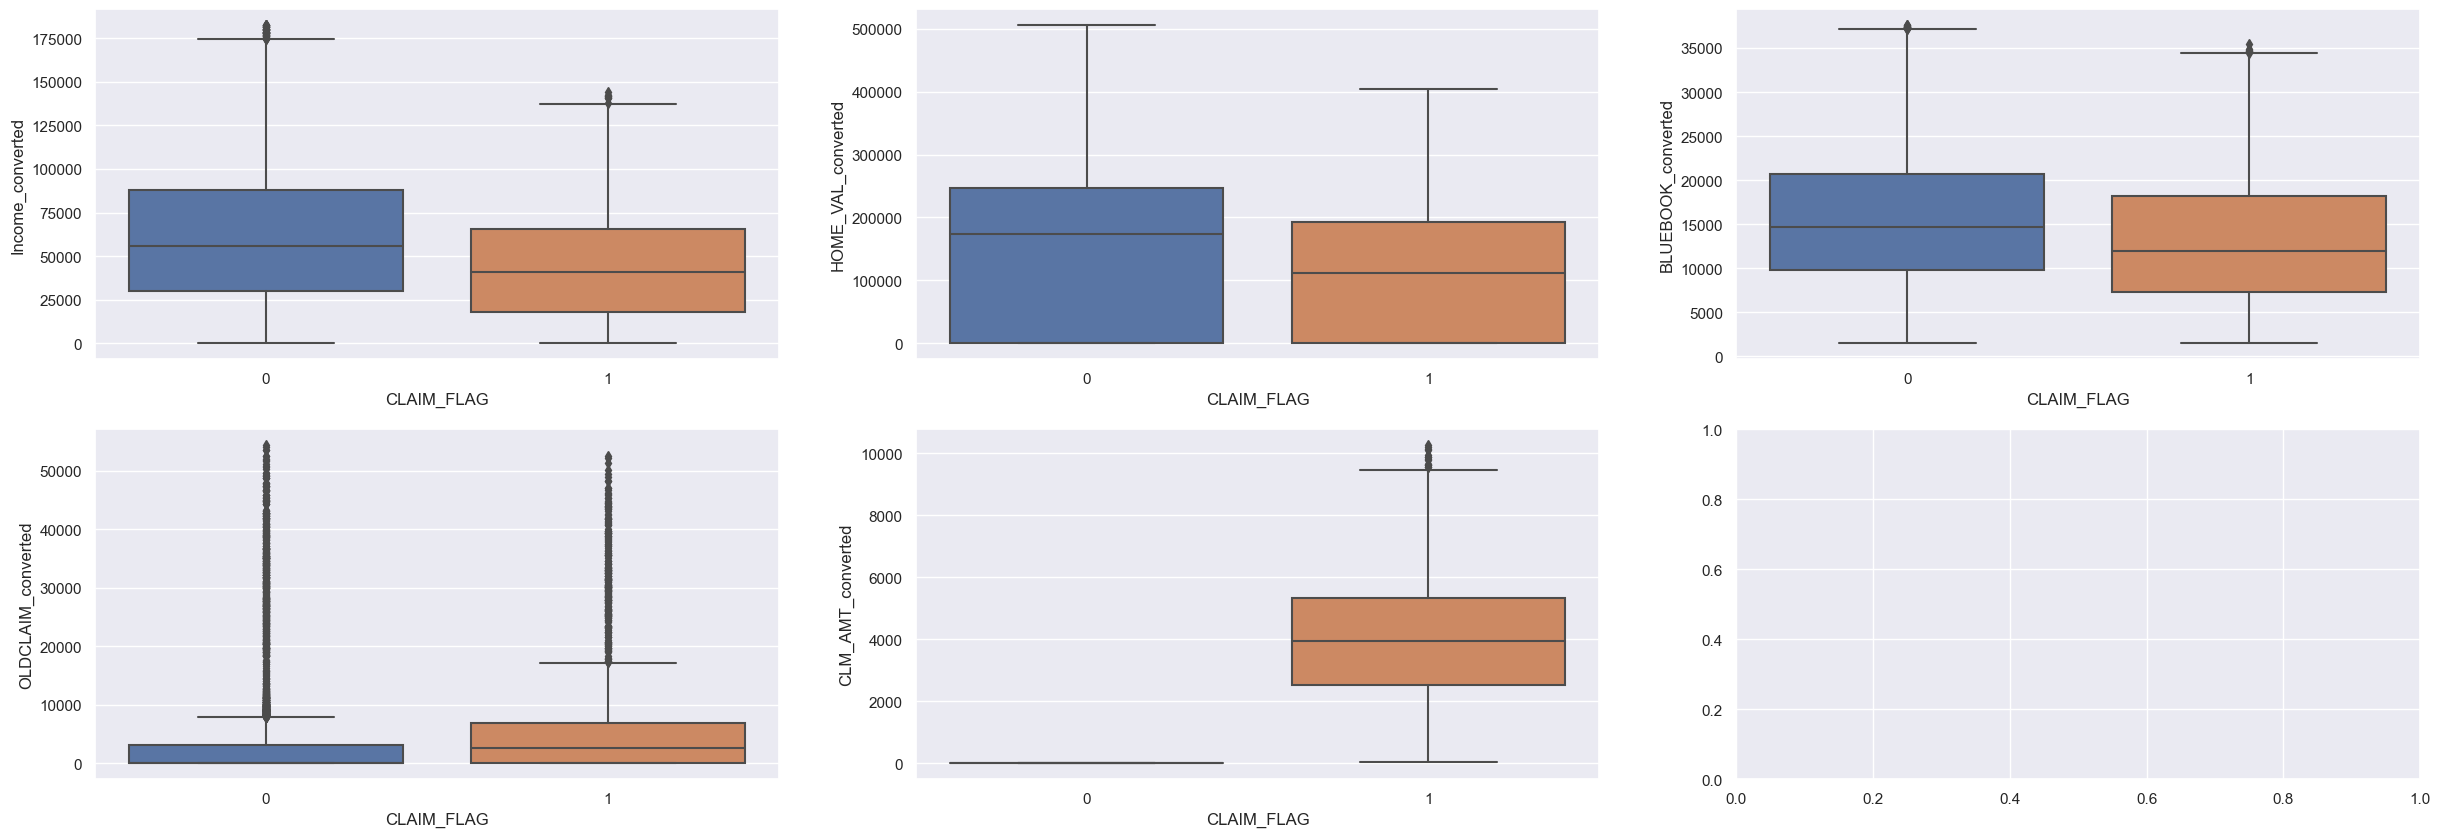

In [29]:
figure, axis = plt.subplots(2,3, figsize = (30,10))
sns.boxplot(y = 'Income_converted', x = 'CLAIM_FLAG', data = DF2, ax = axis[0,0])
sns.boxplot(y = 'HOME_VAL_converted', x = 'CLAIM_FLAG', data = DF2, ax = axis[0,1])
sns.boxplot(y = 'BLUEBOOK_converted', x = 'CLAIM_FLAG', data = DF2, ax = axis[0,2])
sns.boxplot(y = 'OLDCLAIM_converted', x = 'CLAIM_FLAG', data = DF2, ax = axis[1,0])
sns.boxplot(y = 'CLM_AMT_converted', x = 'CLAIM_FLAG', data = DF2, ax = axis[1,1])

# **Data Preprocessing : Outlier Removing Part 2**

In [30]:
class_one = DF2[DF2['CLAIM_FLAG'] == 1]
class_zero = DF2[DF2['CLAIM_FLAG'] == 0]

In [31]:
LR1, UR1 = IQR(class_one.Income_converted)
LR0, UR0 = IQR(class_zero.Income_converted)
class_one = class_one[(class_one['Income_converted'] > LR1) & (class_one['Income_converted'] < UR1)]
class_zero = class_zero[(class_zero['Income_converted'] > LR0) & (class_zero['Income_converted'] < UR0)]

In [32]:
LR1, UR1 = IQR(class_one.HOME_VAL_converted)
LR0, UR0 = IQR(class_zero.HOME_VAL_converted)
class_one = class_one[(class_one['HOME_VAL_converted'] > LR1) & (class_one['HOME_VAL_converted'] < UR1)]
class_zero = class_zero[(class_zero['HOME_VAL_converted'] > LR0) & (class_zero['HOME_VAL_converted'] < UR0)]

In [33]:
LR1, UR1 = IQR(class_one.BLUEBOOK_converted)
LR0, UR0 = IQR(class_zero.BLUEBOOK_converted)
class_one = class_one[(class_one['BLUEBOOK_converted'] > LR1) & (class_one['BLUEBOOK_converted'] < UR1)]
class_zero = class_zero[(class_zero['BLUEBOOK_converted'] > LR0) & (class_zero['BLUEBOOK_converted'] < UR0)]

In [34]:
LR1, UR1 = IQR(class_one.CLM_AMT_converted)
class_one = class_one[(class_one['CLM_AMT_converted'] > LR1) & (class_one['CLM_AMT_converted'] < UR1)]

In [35]:
DF3 = pd.concat([class_one, class_zero], axis = 0)

In [36]:
DF3.drop('OLDCLAIM_converted', axis = 1, inplace = True)

<AxesSubplot:xlabel='CLAIM_FLAG', ylabel='CLM_AMT_converted'>

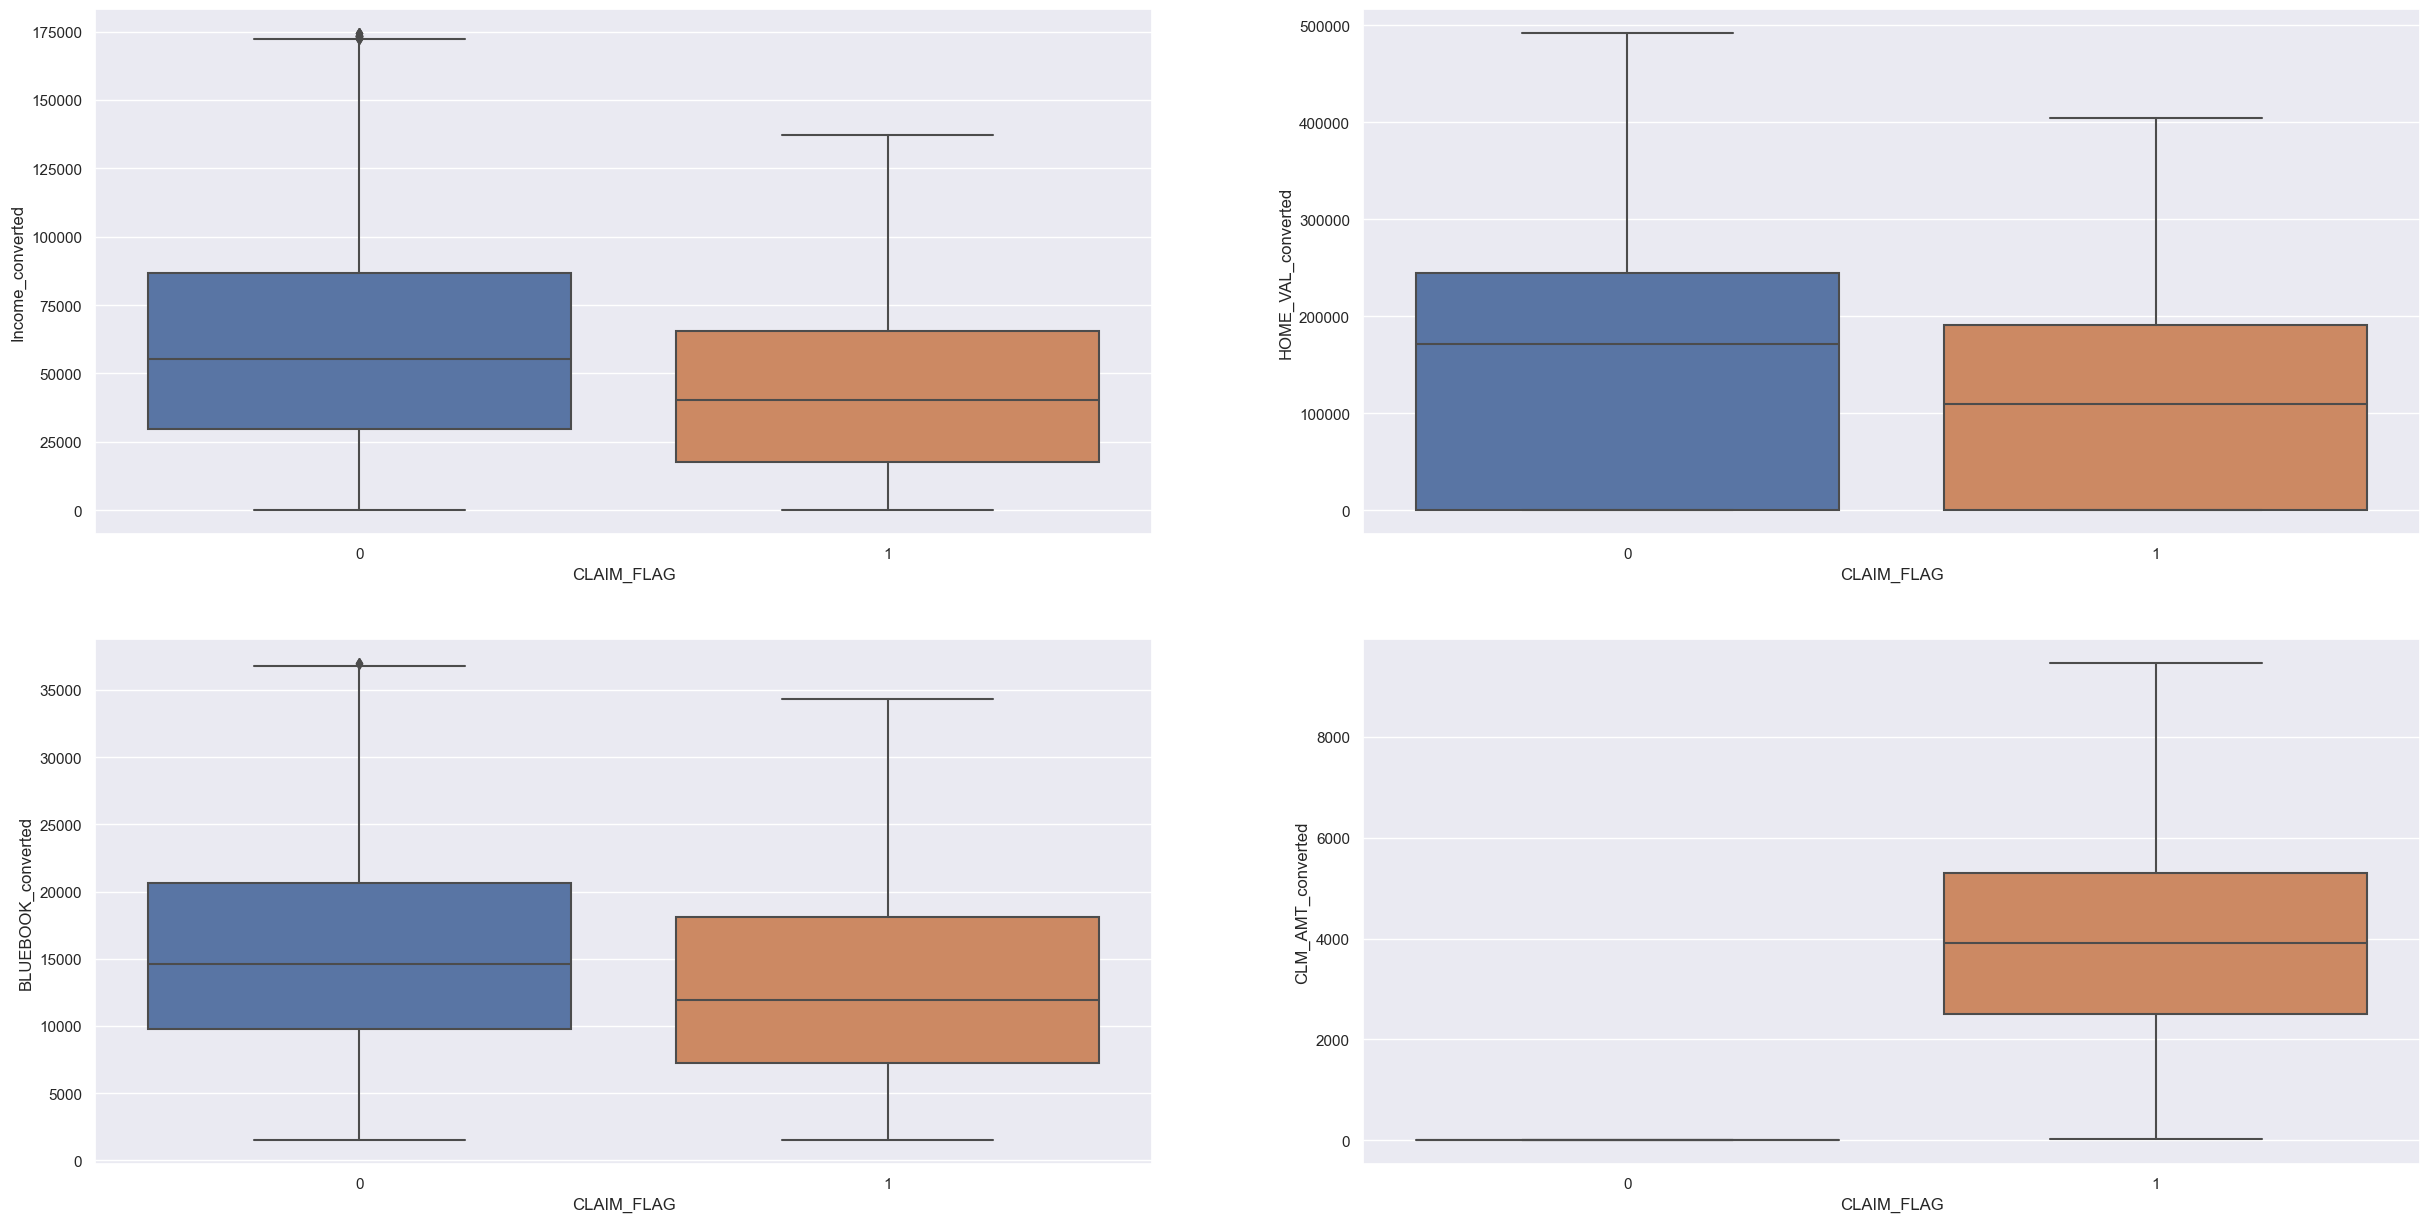

In [37]:
figure, axis = plt.subplots(2,2, figsize = (30,15))
sns.boxplot(y = 'Income_converted', x = 'CLAIM_FLAG', data = DF3, ax = axis[0,0])
sns.boxplot(y = 'HOME_VAL_converted', x = 'CLAIM_FLAG', data = DF3, ax = axis[0,1])
sns.boxplot(y = 'BLUEBOOK_converted', x = 'CLAIM_FLAG', data = DF3, ax = axis[1,0])
sns.boxplot(y = 'CLM_AMT_converted', x = 'CLAIM_FLAG', data = DF3, ax = axis[1,1])

# **Data Preprocessing : Fill NaN Values**

In [38]:
DF3.isnull().sum()

ID                      0
KIDSDRIV                0
AGE                     4
HOMEKIDS                0
YOJ                   457
PARENT1                 0
MSTATUS                 0
GENDER                  0
EDUCATION               0
OCCUPATION            438
TRAVTIME                0
CAR_USE                 0
TIF                     0
CAR_TYPE                0
RED_CAR                 0
CLM_FREQ                0
REVOKED                 0
MVR_PTS                 0
CAR_AGE               522
CLAIM_FLAG              0
URBANICITY              0
Income_converted        0
HOME_VAL_converted      0
BLUEBOOK_converted      0
CLM_AMT_converted       0
dtype: int64

In [39]:
DF3['AGE'].fillna(np.median(DF3['AGE']), inplace = True)

In [40]:
DF3['YOJ'].fillna(stats.mode(DF3['YOJ'])[0][0], inplace = True)

C:\Users\pratibha patel\AppData\Local\Temp\ipykernel_13224\4267906499.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  DF3['YOJ'].fillna(stats.mode(DF3['YOJ'])[0][0], inplace = True)


In [41]:
DF3['OCCUPATION'].fillna(stats.mode(DF3['OCCUPATION'])[0][0], inplace = True)

C:\Users\pratibha patel\AppData\Local\Temp\ipykernel_13224\343144119.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  DF3['OCCUPATION'].fillna(stats.mode(DF3['OCCUPATION'])[0][0], inplace = True)
C:\Users\pratibha patel\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\pratibha patel\AppData\Local\Temp\ipykernel_13224\343144119.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1

In [42]:
DF3['CAR_AGE'].fillna(stats.mode(DF3['CAR_AGE'])[0][0], inplace = True)

C:\Users\pratibha patel\AppData\Local\Temp\ipykernel_13224\3529641628.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  DF3['CAR_AGE'].fillna(stats.mode(DF3['CAR_AGE'])[0][0], inplace = True)


In [43]:
DF3['AGE'].unique()

array([34., 40., 37., 53., 45., 59., 28., 60., 32., 54., 44., 33., 43.,
       62., 48., 47., 64., 52., 26., 41., 38., 39., 42., 31., 57., nan,
       50., 55., 29., 36., 35., 46., 51., 25., 49., 21., 58., 72., 63.,
       56., 27., 24., 30., 23., 61., 22., 65., 67., 66., 16., 20., 18.,
       19., 76., 69., 80., 70., 81., 73., 68.])

In [44]:
DF3 = DF3.dropna(how = 'any')

# **Data Preprocessing : Balancing Imbalance Data**

<AxesSubplot:xlabel='CLAIM_FLAG', ylabel='count'>

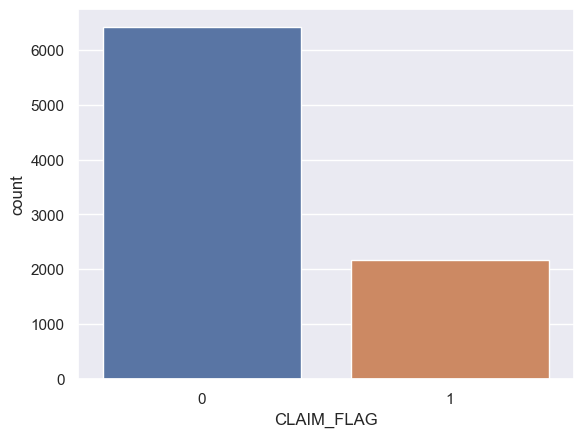

In [45]:
sns.countplot(x = 'CLAIM_FLAG', data = DF3)

In [46]:
X = DF3.drop('CLAIM_FLAG', axis = 1)
Y = DF3['CLAIM_FLAG']

In [47]:
from imblearn.under_sampling import RandomUnderSampler

In [48]:
rus = RandomUnderSampler(random_state=42)
X_underSampled, y_underSampled = rus.fit_resample(X, Y)

In [49]:
X_underSampled.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,RED_CAR,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,Income_converted,HOME_VAL_converted,BLUEBOOK_converted,CLM_AMT_converted
0,544790956,0,45.0,1,10.0,No,Yes,z_F,Masters,Professional,...,no,0,No,1,17.0,Highly Urban/ Urban,89187.0,241074.0,17720.0,0.0
1,895787911,0,36.0,0,10.0,No,z_No,M,Masters,z_Blue Collar,...,no,2,No,3,13.0,Highly Urban/ Urban,149140.0,399270.0,34700.0,0.0
2,441848412,0,53.0,0,7.0,No,Yes,z_F,z_High School,Home Maker,...,no,0,No,2,7.0,Highly Urban/ Urban,3528.0,73903.0,7150.0,0.0
3,583441358,0,55.0,0,10.0,No,Yes,z_F,Masters,Manager,...,no,0,No,0,13.0,Highly Urban/ Urban,109900.0,320515.0,9500.0,0.0
4,638479990,0,46.0,0,13.0,No,Yes,M,Bachelors,Professional,...,no,0,No,2,9.0,Highly Urban/ Urban,26353.0,128701.0,11350.0,0.0


In [50]:
DF4  =pd.concat([X_underSampled, y_underSampled], axis = 1)
DF4.head(7)

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,Income_converted,HOME_VAL_converted,BLUEBOOK_converted,CLM_AMT_converted,CLAIM_FLAG
0,544790956,0,45.0,1,10.0,No,Yes,z_F,Masters,Professional,...,0,No,1,17.0,Highly Urban/ Urban,89187.0,241074.0,17720.0,0.0,0
1,895787911,0,36.0,0,10.0,No,z_No,M,Masters,z_Blue Collar,...,2,No,3,13.0,Highly Urban/ Urban,149140.0,399270.0,34700.0,0.0,0
2,441848412,0,53.0,0,7.0,No,Yes,z_F,z_High School,Home Maker,...,0,No,2,7.0,Highly Urban/ Urban,3528.0,73903.0,7150.0,0.0,0
3,583441358,0,55.0,0,10.0,No,Yes,z_F,Masters,Manager,...,0,No,0,13.0,Highly Urban/ Urban,109900.0,320515.0,9500.0,0.0,0
4,638479990,0,46.0,0,13.0,No,Yes,M,Bachelors,Professional,...,0,No,2,9.0,Highly Urban/ Urban,26353.0,128701.0,11350.0,0.0,0
5,789536767,0,54.0,0,15.0,No,Yes,z_F,Masters,Lawyer,...,0,No,1,21.0,Highly Urban/ Urban,64787.0,228544.0,6900.0,0.0,0
6,627068724,0,51.0,0,7.0,No,Yes,z_F,Masters,Lawyer,...,0,No,3,17.0,Highly Urban/ Urban,171649.0,434676.0,23760.0,0.0,0


<AxesSubplot:xlabel='CLAIM_FLAG', ylabel='count'>

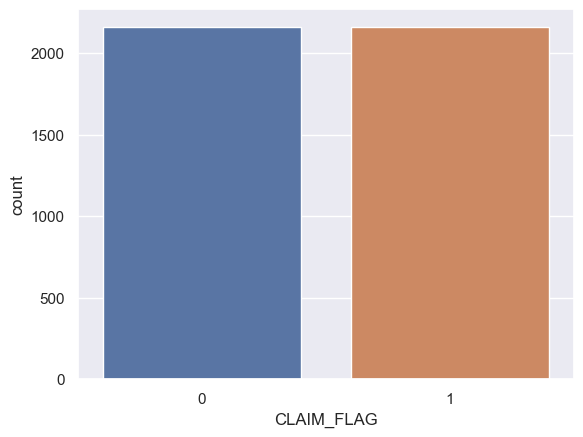

In [51]:
sns.countplot(x = 'CLAIM_FLAG', data = DF4)

In [52]:
DF4.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,...,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,Income_converted,HOME_VAL_converted,BLUEBOOK_converted,CLM_AMT_converted,CLAIM_FLAG
0,544790956,0,45.0,1,10.0,No,Yes,z_F,Masters,Professional,...,0,No,1,17.0,Highly Urban/ Urban,89187.0,241074.0,17720.0,0.0,0
1,895787911,0,36.0,0,10.0,No,z_No,M,Masters,z_Blue Collar,...,2,No,3,13.0,Highly Urban/ Urban,149140.0,399270.0,34700.0,0.0,0
2,441848412,0,53.0,0,7.0,No,Yes,z_F,z_High School,Home Maker,...,0,No,2,7.0,Highly Urban/ Urban,3528.0,73903.0,7150.0,0.0,0
3,583441358,0,55.0,0,10.0,No,Yes,z_F,Masters,Manager,...,0,No,0,13.0,Highly Urban/ Urban,109900.0,320515.0,9500.0,0.0,0
4,638479990,0,46.0,0,13.0,No,Yes,M,Bachelors,Professional,...,0,No,2,9.0,Highly Urban/ Urban,26353.0,128701.0,11350.0,0.0,0


# **Data Preprocessing : Label Encoding**

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
LE_PARENT1 = LabelEncoder()
LE_PARENT1.fit(DF4.PARENT1)
DF4['LE_PARENT1'] = LE_PARENT1.transform(DF4.PARENT1)

In [55]:
LE_MSTATUS = LabelEncoder()
LE_MSTATUS.fit(DF4.MSTATUS)
DF4['LE_MSTATUS'] = LE_MSTATUS.transform(DF4.MSTATUS)

In [56]:
LE_GENDER = LabelEncoder()
LE_GENDER.fit(DF4.GENDER)
DF4['LE_GENDER'] = LE_GENDER.transform(DF4.GENDER)

In [57]:
LE_EDUCATION = LabelEncoder()
LE_EDUCATION.fit(DF4.EDUCATION)
DF4['LE_EDUCATION'] = LE_EDUCATION.transform(DF4.EDUCATION)

In [58]:
LE_OCCUPATION = LabelEncoder()
LE_OCCUPATION.fit(DF4.OCCUPATION)
DF4['LE_OCCUPATION'] = LE_OCCUPATION.transform(DF4.OCCUPATION)

In [59]:
LE_CAR_USE = LabelEncoder()
LE_CAR_USE.fit(DF4.CAR_USE)
DF4['LE_CAR_USE'] = LE_CAR_USE.transform(DF4.CAR_USE)

In [60]:
LE_CAR_TYPE = LabelEncoder()
LE_CAR_TYPE.fit(DF4.CAR_TYPE)
DF4['LE_CAR_TYPE'] = LE_CAR_TYPE.transform(DF4.CAR_TYPE)

In [61]:
LE_RED_CAR = LabelEncoder()
LE_RED_CAR.fit(DF4.RED_CAR)
DF4['LE_RED_CAR'] = LE_RED_CAR.transform(DF4.RED_CAR)

In [62]:
LE_REVOKED = LabelEncoder()
LE_REVOKED.fit(DF4.REVOKED)
DF4['LE_REVOKED'] = LE_REVOKED.transform(DF4.REVOKED)

In [63]:
DF5 = DF4.drop(['PARENT1', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED'], axis = 1)
DF5.head()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,...,CLAIM_FLAG,LE_PARENT1,LE_MSTATUS,LE_GENDER,LE_EDUCATION,LE_OCCUPATION,LE_CAR_USE,LE_CAR_TYPE,LE_RED_CAR,LE_REVOKED
0,544790956,0,45.0,1,10.0,29,4,0,1,17.0,...,0,0,0,1,2,5,1,5,0,0
1,895787911,0,36.0,0,10.0,43,7,2,3,13.0,...,0,0,1,0,2,7,0,1,0,0
2,441848412,0,53.0,0,7.0,54,10,0,2,7.0,...,0,0,0,1,4,2,1,5,0,0
3,583441358,0,55.0,0,10.0,7,4,0,0,13.0,...,0,0,0,1,2,4,1,5,0,0
4,638479990,0,46.0,0,13.0,35,10,0,2,9.0,...,0,0,0,0,1,5,1,2,0,0


In [64]:
DF5.drop(['ID', 'URBANICITY'], axis = 1, inplace = True)
DF5.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,Income_converted,...,CLAIM_FLAG,LE_PARENT1,LE_MSTATUS,LE_GENDER,LE_EDUCATION,LE_OCCUPATION,LE_CAR_USE,LE_CAR_TYPE,LE_RED_CAR,LE_REVOKED
0,0,45.0,1,10.0,29,4,0,1,17.0,89187.0,...,0,0,0,1,2,5,1,5,0,0
1,0,36.0,0,10.0,43,7,2,3,13.0,149140.0,...,0,0,1,0,2,7,0,1,0,0
2,0,53.0,0,7.0,54,10,0,2,7.0,3528.0,...,0,0,0,1,4,2,1,5,0,0
3,0,55.0,0,10.0,7,4,0,0,13.0,109900.0,...,0,0,0,1,2,4,1,5,0,0
4,0,46.0,0,13.0,35,10,0,2,9.0,26353.0,...,0,0,0,0,1,5,1,2,0,0


#**Correlation Matrix**

<AxesSubplot:>

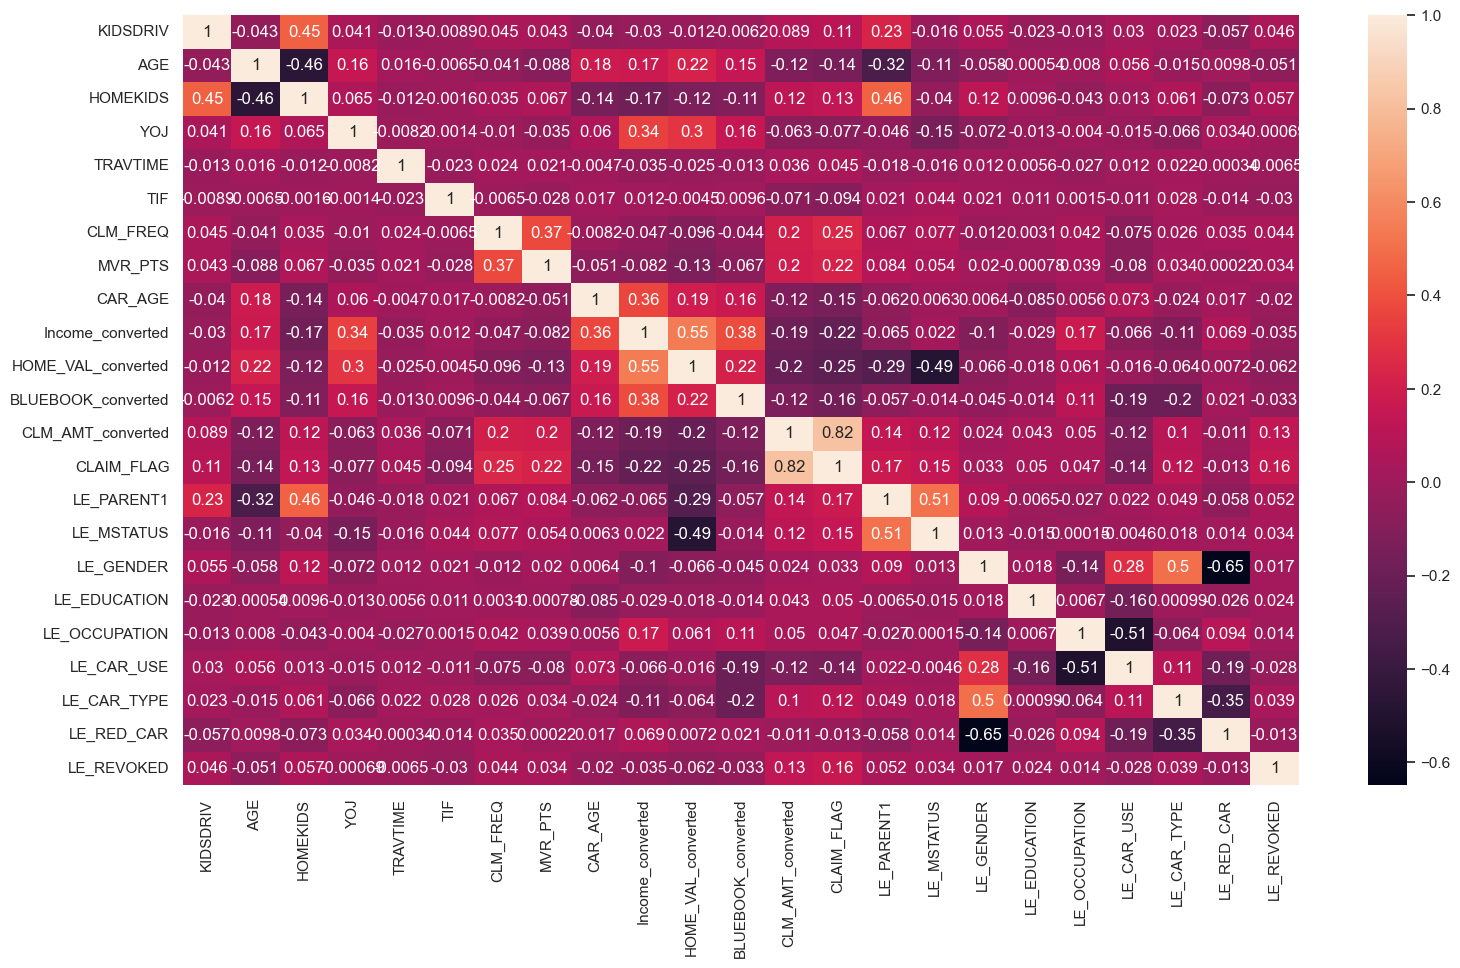

In [65]:
correlation = DF5.corr()

sns.set_theme()
plt.figure(figsize = (18,10))
sns.heatmap(correlation, cbar = True, annot = True)

In [66]:
DF6 = DF5.drop(['LE_RED_CAR', 'LE_GENDER', 'TRAVTIME', 'LE_OCCUPATION'], axis = 1)
DF6.head()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,Income_converted,HOME_VAL_converted,BLUEBOOK_converted,CLM_AMT_converted,CLAIM_FLAG,LE_PARENT1,LE_MSTATUS,LE_EDUCATION,LE_CAR_USE,LE_CAR_TYPE,LE_REVOKED
0,0,45.0,1,10.0,4,0,1,17.0,89187.0,241074.0,17720.0,0.0,0,0,0,2,1,5,0
1,0,36.0,0,10.0,7,2,3,13.0,149140.0,399270.0,34700.0,0.0,0,0,1,2,0,1,0
2,0,53.0,0,7.0,10,0,2,7.0,3528.0,73903.0,7150.0,0.0,0,0,0,4,1,5,0
3,0,55.0,0,10.0,4,0,0,13.0,109900.0,320515.0,9500.0,0.0,0,0,0,2,1,5,0
4,0,46.0,0,13.0,10,0,2,9.0,26353.0,128701.0,11350.0,0.0,0,0,0,1,1,2,0


# **Data Preprocessing : Standard Scaler**

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
X = DF6.drop(['CLAIM_FLAG','CLM_AMT_converted'], axis = 1)
Y = DF6['CLAIM_FLAG']

In [69]:
SD = StandardScaler()
SD.fit(X)
X_std = SD.transform(X)

In [70]:
import pickle
with open('SD.pickle','wb') as f:
    pickle.dump(SD,f)

In [72]:
data_file = X.copy()
data_file.to_csv('X.csv', index=None)

# **Data Preprocessing : Train Test Split**

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_std, Y, test_size = 0.2, random_state = 42)

In [74]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3459, 17), (865, 17), (3459,), (865,))

# **Model Building : Logistic Regression**

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train, y_train)

LogisticRegression()

In [77]:
y_predicted_Logistic = model_logistic.predict(x_test)

In [78]:
logistic_score = model_logistic.score(x_test,y_test)
logistic_score

0.7121387283236994

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test, y_predicted_Logistic))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       446
           1       0.70      0.71      0.70       419

    accuracy                           0.71       865
   macro avg       0.71      0.71      0.71       865
weighted avg       0.71      0.71      0.71       865



In [81]:
#dumping model into pickle file
import pickle
with open('LogisticRegression.pickle','wb') as f:
    pickle.dump(model_logistic,f)

# **Model Building : Support Vector Machine (SVM)**

In [82]:
from sklearn import svm

In [83]:
SVM_model = svm.SVC()
SVM_model.fit(x_train,y_train)

SVC()

In [84]:
y_predicted_SVM = SVM_model.predict(x_test)
SVM_Score = SVM_model.score(x_test,y_test)
SVM_Score

0.7144508670520231

In [85]:
print(classification_report(y_test, y_predicted_SVM))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       446
           1       0.70      0.71      0.71       419

    accuracy                           0.71       865
   macro avg       0.71      0.71      0.71       865
weighted avg       0.71      0.71      0.71       865



# **Model Building : KNearest Neighbor**

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [88]:
y_predicted_KNN = KNN_model.predict(x_test) 
KNN_Score = KNN_model.score(x_test,y_test)
KNN_Score

C:\Users\pratibha patel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pratibha patel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

0.6543352601156069

In [89]:
print(classification_report(y_test, y_predicted_KNN))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66       446
           1       0.64      0.65      0.65       419

    accuracy                           0.65       865
   macro avg       0.65      0.65      0.65       865
weighted avg       0.65      0.65      0.65       865



# **Model Building : Naive Bayes**

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
naive_bayes_model= GaussianNB()
naive_bayes_model.fit(x_train, y_train)

GaussianNB()

In [92]:
y_predicted_naive = naive_bayes_model.predict(x_test)
Naive_Bayes_Score = naive_bayes_model.score(x_test,y_test)
Naive_Bayes_Score

0.6936416184971098

In [93]:
print(classification_report(y_test, y_predicted_naive))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       446
           1       0.70      0.65      0.67       419

    accuracy                           0.69       865
   macro avg       0.69      0.69      0.69       865
weighted avg       0.69      0.69      0.69       865



# **Model Building : Decision Tree**

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
deseciontree_model=DecisionTreeClassifier()
deseciontree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [96]:
y_predicted_deseciontree = deseciontree_model.predict(x_test)
DTree_Score = deseciontree_model.score(x_test,y_test)
DTree_Score

0.6404624277456648

In [97]:
print(classification_report(y_test, y_predicted_deseciontree))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       446
           1       0.63      0.64      0.63       419

    accuracy                           0.64       865
   macro avg       0.64      0.64      0.64       865
weighted avg       0.64      0.64      0.64       865



# **Model Building : Random Forest**

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
randomforest_model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
randomforest_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [100]:
y_predicted_randomforest = randomforest_model.predict(x_test)
RF_Score = randomforest_model.score(x_test,y_test)
RF_Score

0.6809248554913295

In [101]:
print(classification_report(y_test, y_predicted_randomforest))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       446
           1       0.69      0.61      0.65       419

    accuracy                           0.68       865
   macro avg       0.68      0.68      0.68       865
weighted avg       0.68      0.68      0.68       865



# **Model Building : AdaBoost Classifier**

In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
AdaBoostClassifier_model= AdaBoostClassifier(n_estimators=100, random_state=0)
AdaBoostClassifier_model.fit(x_train,y_train )

AdaBoostClassifier(n_estimators=100, random_state=0)

In [104]:
y_predicted_AdaBoostClassifier_model=AdaBoostClassifier_model.predict(x_test)
AB_Score = AdaBoostClassifier_model.score(x_test,y_test)
AB_Score

0.7179190751445087

In [105]:
print(classification_report(y_test, y_predicted_AdaBoostClassifier_model))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       446
           1       0.70      0.73      0.71       419

    accuracy                           0.72       865
   macro avg       0.72      0.72      0.72       865
weighted avg       0.72      0.72      0.72       865



# **Model Building : Gradient Boosting**

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
GradientBoostingClassifier_model=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0)
GradientBoostingClassifier_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.0)

In [108]:
y_predicted_GradientBoostingClassifier_model=GradientBoostingClassifier_model.predict(x_test)
GB_Score = GradientBoostingClassifier_model.score(x_test,y_test)
GB_Score

0.7005780346820809

In [109]:
print(classification_report(y_test, y_predicted_GradientBoostingClassifier_model))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       446
           1       0.69      0.69      0.69       419

    accuracy                           0.70       865
   macro avg       0.70      0.70      0.70       865
weighted avg       0.70      0.70      0.70       865



# **Final Report**

In [110]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [111]:
Model_Names = ['Logistic Regression', 'SVM', 'KNearest Neighbor', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'AdaBoost Classifier', 'Gradient Boosting']
Scores = [logistic_score, SVM_Score, KNN_Score, Naive_Bayes_Score, DTree_Score, RF_Score, AB_Score, GB_Score]
Precision = [precision_score(y_test, y_predicted_Logistic), precision_score(y_test, y_predicted_SVM), precision_score(y_test, y_predicted_KNN), precision_score(y_test, y_predicted_naive), precision_score(y_test, y_predicted_deseciontree), precision_score(y_test, y_predicted_randomforest), precision_score(y_test, y_predicted_AdaBoostClassifier_model), precision_score(y_test, y_predicted_GradientBoostingClassifier_model)]
Recall = [recall_score(y_test, y_predicted_Logistic), recall_score(y_test, y_predicted_SVM), recall_score(y_test, y_predicted_KNN), recall_score(y_test, y_predicted_naive), recall_score(y_test, y_predicted_deseciontree), recall_score(y_test, y_predicted_randomforest), recall_score(y_test, y_predicted_AdaBoostClassifier_model), recall_score(y_test, y_predicted_GradientBoostingClassifier_model)]


In [112]:
Report_DF = pd.DataFrame()

Report_DF['Model Name'] = Model_Names
Report_DF['Accuracy_Score'] = Scores
Report_DF['Precision'] = Precision
Report_DF['Recall'] = Recall

In [113]:
sns.set_theme()
CM = sns.color_palette("light:b", as_cmap=True)
Report_DF.style.background_gradient(cmap=CM)


,Model Name,Accuracy_Score,Precision,Recall
0,Logistic Regression,0.712139,0.701422,0.706444
1,SVM,0.714451,0.703791,0.708831
2,KNearest Neighbor,0.654335,0.640845,0.651551
3,Naive Bayes,0.693642,0.697436,0.649165
4,Decision Tree,0.640462,0.625581,0.642005
5,Random Forest,0.680925,0.692722,0.613365
6,AdaBoost Classifier,0.717919,0.701149,0.727924
7,Gradient Boosting,0.700578,0.692308,0.687351


<AxesSubplot:xlabel='Model Name', ylabel='Accuracy_Score'>

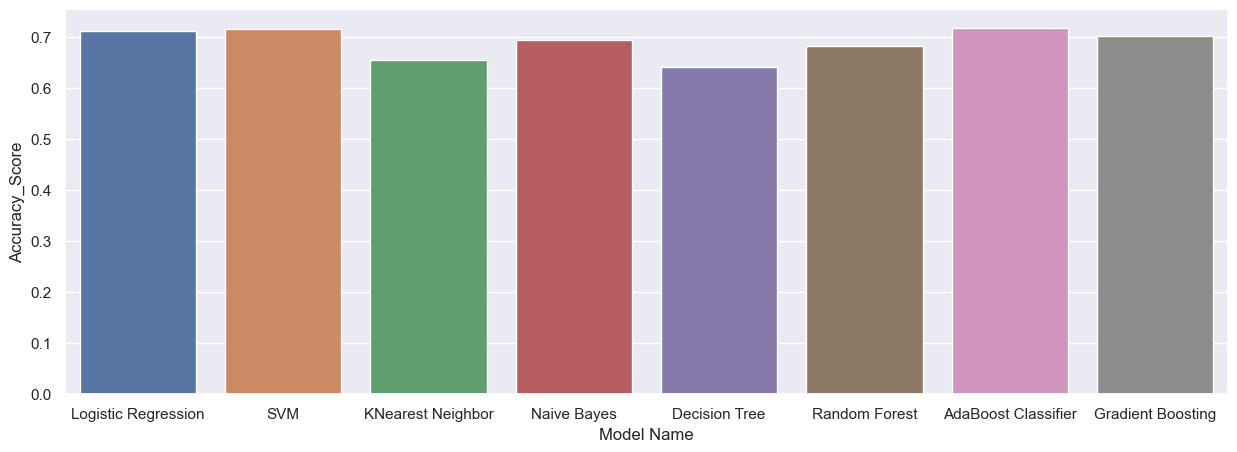

In [114]:
plt.figure(figsize = (15, 5))
sns.set_theme()
sns.barplot(x = 'Model Name', y = 'Accuracy_Score', data = Report_DF)

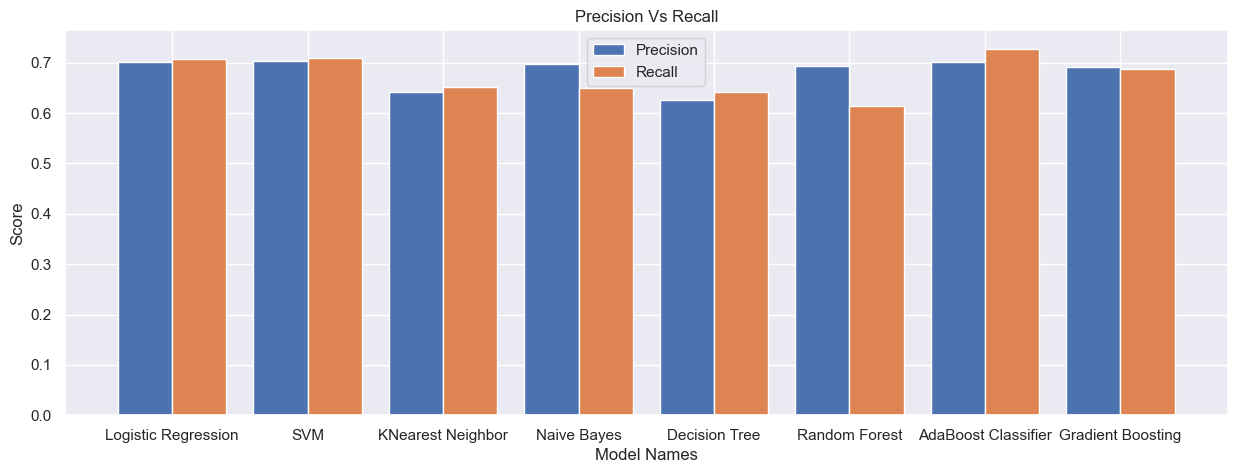

In [115]:
X = Report_DF['Model Name']
YPrecision = Report_DF['Precision']
Zrecall = Report_DF['Recall']
  
X_axis = np.arange(len(Report_DF['Model Name']))
plt.figure(figsize = (15, 5)) 
plt.bar(X_axis - 0.2, YPrecision, 0.4, label = 'Precision')
plt.bar(X_axis + 0.2, Zrecall, 0.4, label = 'Recall')
  
plt.xticks(X_axis, X)
plt.xlabel("Model Names")
plt.ylabel("Score")
plt.title("Precision Vs Recall")
plt.legend()
plt.show()

In [116]:
from sklearn.metrics import roc_auc_score,roc_curve,auc
report = classification_report(y_test,y_predicted_deseciontree)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       446
           1       0.63      0.64      0.63       419

    accuracy                           0.64       865
   macro avg       0.64      0.64      0.64       865
weighted avg       0.64      0.64      0.64       865



In [117]:
roc_auc_score(y_test,y_predicted_deseciontree)
fpr,tpr,threshold =roc_curve(y_test,y_predicted_deseciontree)
auc = auc(fpr,tpr)

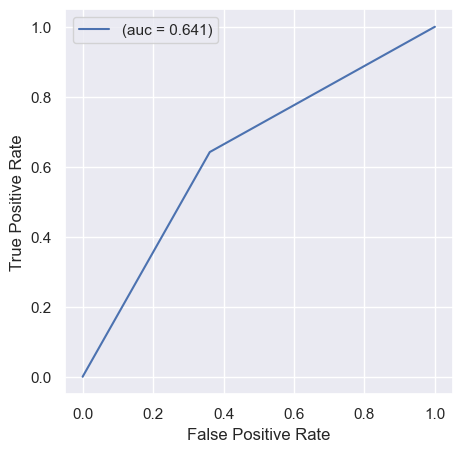

In [118]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()